In [4]:
import random
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

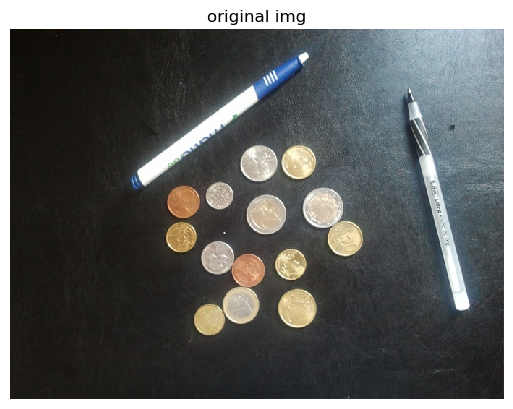

In [5]:
img = cv.imread('money2.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('original img')
plt.axis('off')  # Turn off axis
plt.show()



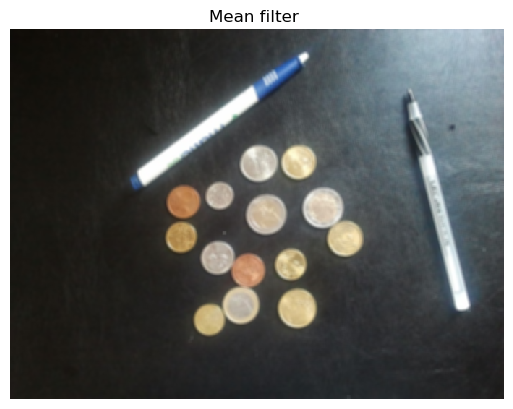

In [6]:
#create the kernel mean
kernelMean =  np.ones((5,5),np.float32)/ 25 # 

# apply it to the image now 
imgMean = cv.filter2D(img_rgb,-1,kernelMean)# 

#show it after 
plt.imshow(imgMean)
plt.title('Mean filter ')
plt.axis('off')  # Turn off axis
plt.show()

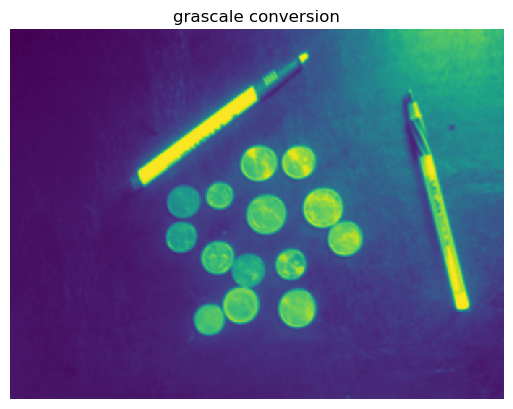

In [12]:
img_gray = cv.cvtColor(imgMean, cv.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.title('grascale conversion')
plt.axis('off')  # Turn off axis
plt.show()

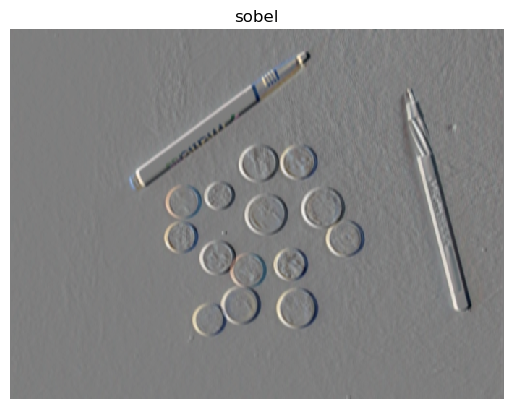

In [18]:
# computes the intensity gradient of the image using a Sobel kernel and plot it on mathplot to see intensity
#review it gray is imgMean 

sobel_x = cv.Sobel(imgMean, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(imgMean, cv.CV_64F, 0, 1, ksize=3)

sobelx_display = cv.normalize(sobel_x, None, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_8U)



plt.imshow(sobelx_display)
plt.title('sobel')
plt.axis('off')
plt.show()




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


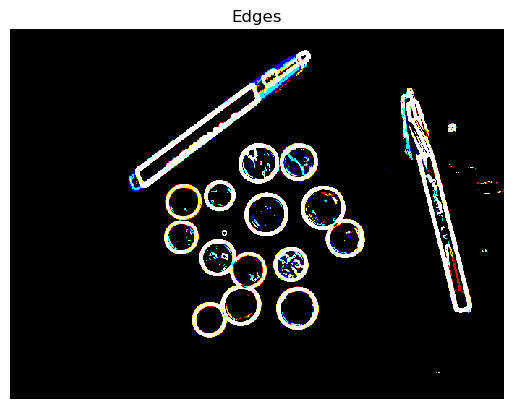

In [21]:
#remove all pixels that are not an edge using a local maximum and Hysteresis thresholding (i.e.the use of two threshold values to take a decision)
#change it an try doing opening and closing .
# Compute the magnitude of the gradient
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

local_max = cv.dilate(gradient_magnitude, np.ones((3,3),np.uint8))

# Optionally, apply a threshold to highlight edges # can be chnage depeding on how we want it 
high_threshold = 100
low_threshold = 50


edges = np.zeros_like(gradient_magnitude)
edges[(gradient_magnitude >= high_threshold) & (local_max == gradient_magnitude)] = 255
edges[(gradient_magnitude >= low_threshold) & (local_max != gradient_magnitude)] = 128

# Show the edges
plt.imshow(edges)
plt.title('Edges')
plt.axis('off')
plt.show()

In [24]:
def find_circles(edge_points, iterations):
    best_circles = []

    for _ in range(iterations):
        # Select three points at random among edge_points list
        a = random.choice(edge_points)
        b = random.choice(edge_points)
        c = random.choice(edge_points)

        # Calculate midpoints
        midpt_ab = ((a[0] + b[0]) / 2, (a[1] + b[1]) / 2)
        midpt_bc = ((b[0] + c[0]) / 2, (b[1] + c[1]) / 2)

        # Calculate slopes and intercepts
        slope_ab = (b[1] - a[1]) / (b[0] - a[0] + 0.0000000000001)
        intercept_ab = a[1] - slope_ab * a[0]
        slope_bc = (c[1] - b[1]) / (c[0] - b[0] + 0.0000000000001)
        intercept_bc = c[1] - slope_bc * c[0]

        # Calculate perpendicular slopes and intercepts
        slope_midpt_ab = -1.0 / slope_ab
        slope_midpt_bc = -1.0 / slope_bc
        intercept_midpt_ab = midpt_ab[1] - slope_midpt_ab * midpt_ab[0]
        intercept_midpt_bc = midpt_bc[1] - slope_midpt_bc * midpt_bc[0]

        # Calculate intersection of perpendiculars to find center of circle and radius
        center_x = (intercept_midpt_bc - intercept_midpt_ab) / (slope_midpt_ab - slope_midpt_bc)
        center_y = slope_midpt_ab * center_x + intercept_midpt_ab
        center = (center_x, center_y)
        radius = math.sqrt((center[0] - a[0])**2 + (center[1] - a[1])**2)
        radius = math.sqrt((center[0] - a[0])**2 + (center[1] - a[1])**2)

        circumference = int(round(2.0 * math.pi * radius))


        on_circle = []
        not_on_circle = []
        radius_threshold = 3

        # Find edge_points that fit on circle radius
        for i, point in enumerate(edge_points):
            diff_center = (point[0] - center[0], point[1] - center[1])
            distance_to_center = math.sqrt(diff_center[0]**2 + diff_center[1]**2)
            if abs(distance_to_center - radius) < radius_threshold:
                on_circle.append(i)
            else:
                not_on_circle.append(i)

        # If number of edge_points more than circumference, we found a correct circle
        if len(on_circle) >= circumference:
            best_circles.append((center, radius))

        # remove edge_points if circle found (only keep non-voting edge_points)
        to_keep = [edge_points[i] for i in not_on_circle]

        # update edge_points
        edge_points = to_keep

        # stop iterations when there is not enough edge_points
        if len(edge_points) < 100:
            break

    return best_circles

In [25]:
Ransac = find_circles(edges, 100)
plt.imshow(Ransac)
plt.title('Ransac Circles')
plt.axis('off')
plt.show()


/tmp/ipykernel_19173/1251558884.py:21: RuntimeWarning: divide by zero encountered in divide
  slope_midpt_ab = -1.0 / slope_ab
/tmp/ipykernel_19173/1251558884.py:22: RuntimeWarning: divide by zero encountered in divide
  slope_midpt_bc = -1.0 / slope_bc
/tmp/ipykernel_19173/1251558884.py:23: RuntimeWarning: invalid value encountered in multiply
  intercept_midpt_ab = midpt_ab[1] - slope_midpt_ab * midpt_ab[0]
/tmp/ipykernel_19173/1251558884.py:24: RuntimeWarning: invalid value encountered in multiply
  intercept_midpt_bc = midpt_bc[1] - slope_midpt_bc * midpt_bc[0]
/tmp/ipykernel_19173/1251558884.py:27: RuntimeWarning: invalid value encountered in subtract
  center_x = (intercept_midpt_bc - intercept_midpt_ab) / (slope_midpt_ab - slope_midpt_bc)


TypeError: only size-1 arrays can be converted to Python scalars